### Task 2: Credit Risk Prediction

**Objective:**
Predict whether a loan applicant is likely to default on a loan.
***
**Dataset:**
Loan Prediction Dataset (available on Kaggle)

**Instructions:**
- Handle missing data appropriately.
- Visualize key features such as loan amount, education, and income.
- Train a classification model like Logistic Regression or Decision Tree.
- Evaluate the model using accuracy and a confusion matrix.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ninzaami/loan-predication")

print("Path to dataset files:", path)

c:\Users\Muhammad Faizan Ali\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Muhammad Faizan Ali\.cache\kagglehub\datasets\ninzaami\loan-predication\versions\1


In [3]:
import pandas as pd

dataFrame = pd.read_csv("LoanPrediction.csv")

dataFrame

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA

In [4]:
row, column = dataFrame.shape
print(row, column)

614 13


In [5]:
dataFrame.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
dataFrame["Gender"].fillna(dataFrame["Gender"].mode()[0], inplace=True)
dataFrame["Married"].fillna(dataFrame["Married"].mode()[0], inplace=True)
dataFrame["Dependents"].fillna(dataFrame["Dependents"].mode()[0], inplace=True)
dataFrame["Self_Employed"].fillna(dataFrame["Self_Employed"].mode()[0], inplace=True)
dataFrame["LoanAmount"].fillna(dataFrame["LoanAmount"].median(), inplace=True)
dataFrame["Loan_Amount_Term"].fillna(dataFrame["Loan_Amount_Term"].mode()[0], inplace=True)
dataFrame["Credit_History"].fillna(dataFrame["Credit_History"].mode()[0], inplace=True)

C:\Users\Muhammad Faizan Ali\AppData\Local\Temp\ipykernel_236\1218710578.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataFrame["Gender"].fillna(dataFrame["Gender"].mode()[0], inplace=True)
C:\Users\Muhammad Faizan Ali\AppData\Local\Temp\ipykernel_236\1218710578.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [7]:
dataFrame.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
dataFrame["Dependents"] = dataFrame["Dependents"].replace(to_replace="3+", value='4')

In [9]:
dataFrame["Gender"] = dataFrame["Gender"].map({'Male': 1, 'Female': 0}).astype('int')
dataFrame["Married"] = dataFrame["Married"].map({'Yes': 1, 'No': 0}).astype('int')
dataFrame["Education"] = dataFrame["Education"].map({'Graduate': 1, 'Not Graduate': 0}).astype('int')
dataFrame["Self_Employed"] = dataFrame["Self_Employed"].map({'Yes': 1, 'No': 0}).astype('int')
dataFrame["Property_Area"] = dataFrame["Property_Area"].map({'Rural': 0,'Urban': 1, 'Semiurban': 2}).astype('int')
dataFrame["Loan_Status"] = dataFrame["Loan_Status"].map({'Y': 1, 'N': 0}).astype('int')
dataFrame

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [40]:
dataFrame.drop("Loan_ID", axis=1, inplace=True)

# VISUALIZATION

Text(0.5, 1.0, 'Loan Approval Status')

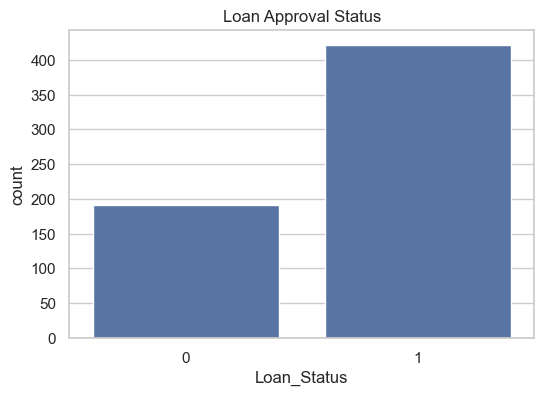

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for inline plotting in Jupyter
%matplotlib inline

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x="Loan_Status", data=dataFrame)
plt.title("Loan Approval Status")

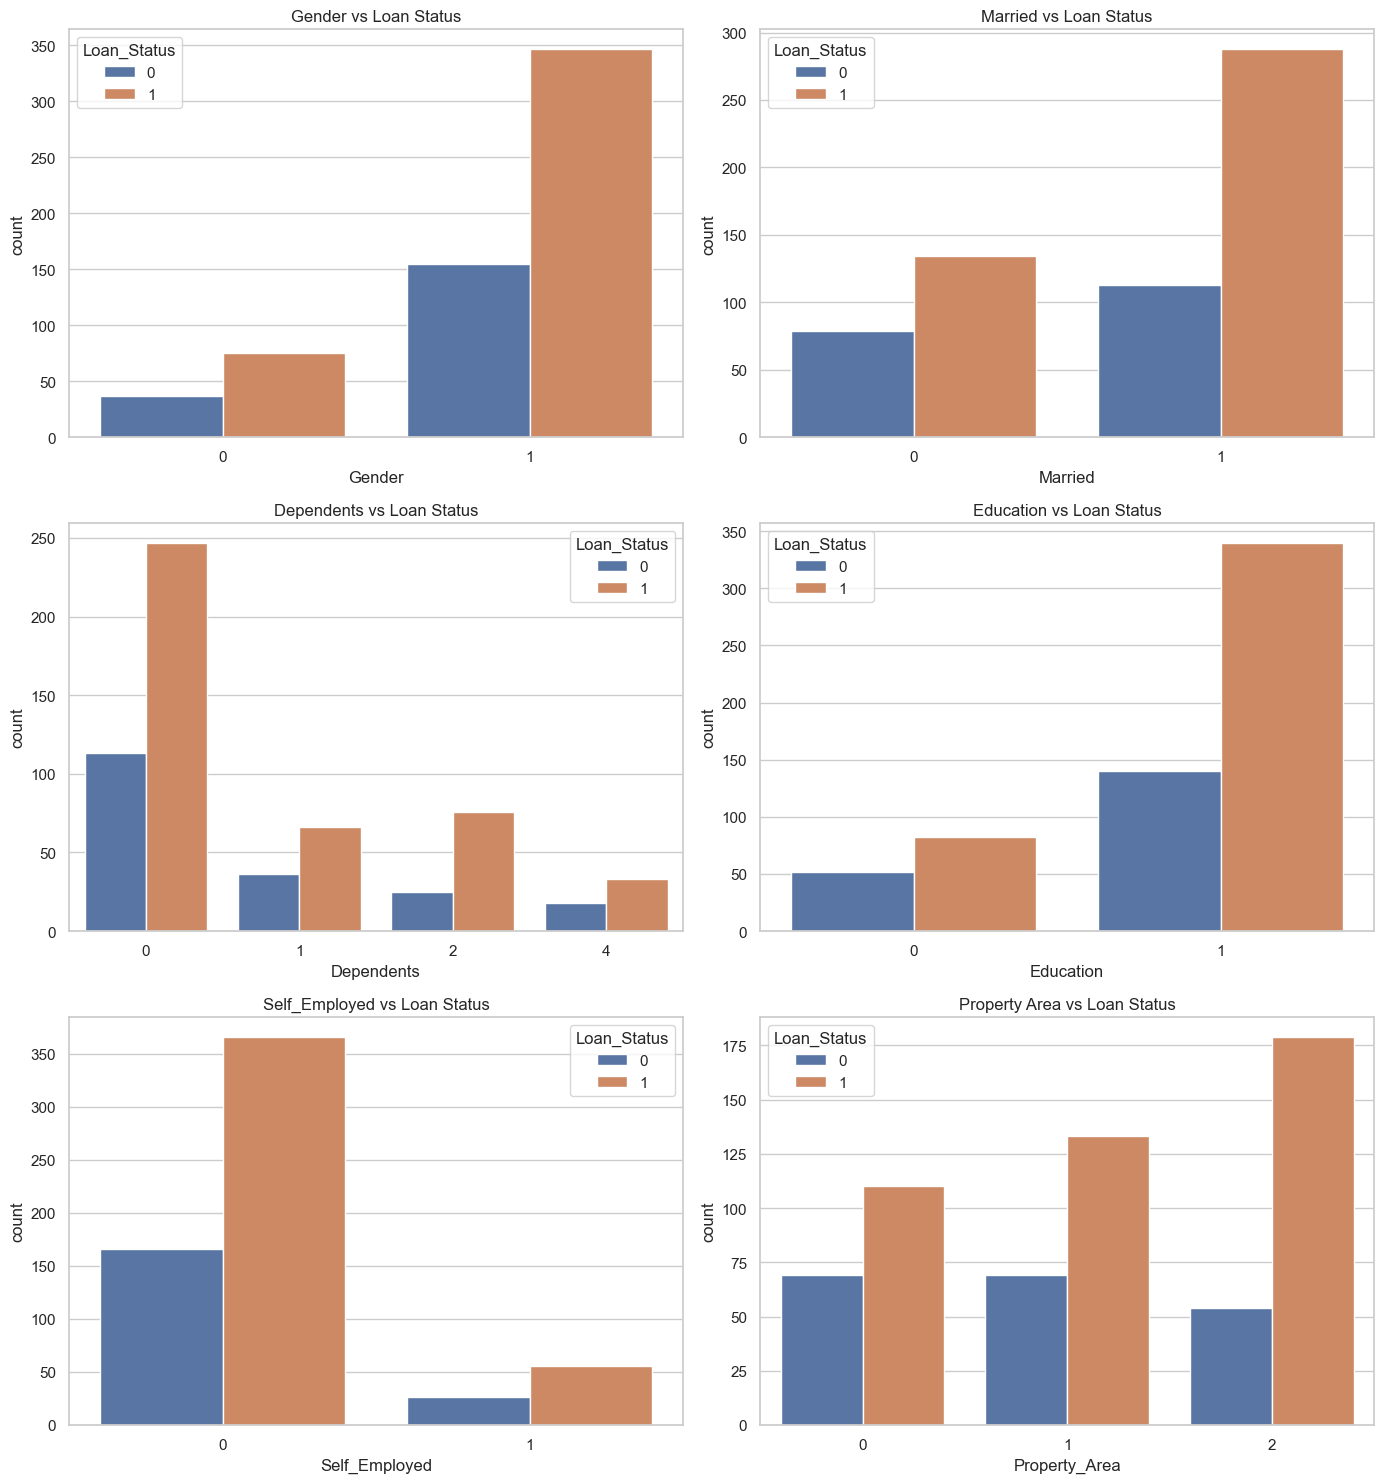

In [42]:
sns.set(style="whitegrid")

# Create 3 rows and 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Row 1
sns.countplot(x="Gender", hue="Loan_Status", data=dataFrame, ax=axes[0, 0])
axes[0, 0].set_title("Gender vs Loan Status")

sns.countplot(x="Married", hue="Loan_Status", data=dataFrame, ax=axes[0, 1])
axes[0, 1].set_title("Married vs Loan Status")

# Row 2
sns.countplot(x="Dependents", hue="Loan_Status", data=dataFrame, ax=axes[1, 0])
axes[1, 0].set_title("Dependents vs Loan Status")

sns.countplot(x="Education", hue="Loan_Status", data=dataFrame, ax=axes[1, 1])
axes[1, 1].set_title("Education vs Loan Status")

# Row 3
sns.countplot(x="Self_Employed", hue="Loan_Status", data=dataFrame, ax=axes[2, 0])
axes[2, 0].set_title("Self_Employed vs Loan Status")

sns.countplot(x="Property_Area", hue="Loan_Status", data=dataFrame, ax=axes[2, 1])
axes[2, 1].set_title("Property Area vs Loan Status")

# Adjust layout
plt.tight_layout()

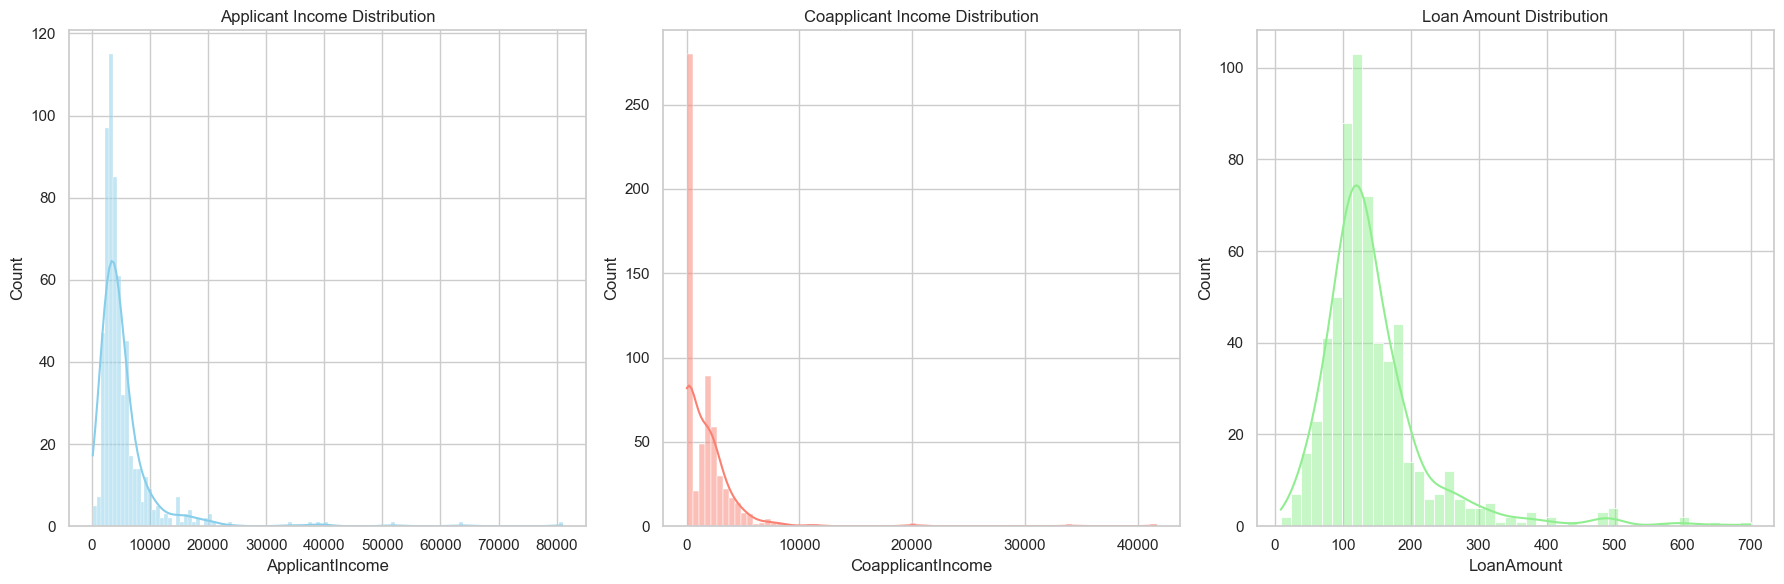

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(dataFrame["ApplicantIncome"], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Applicant Income Distribution")

sns.histplot(dataFrame["CoapplicantIncome"], kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Coapplicant Income Distribution")

sns.histplot(dataFrame["LoanAmount"], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title("Loan Amount Distribution")

plt.tight_layout()

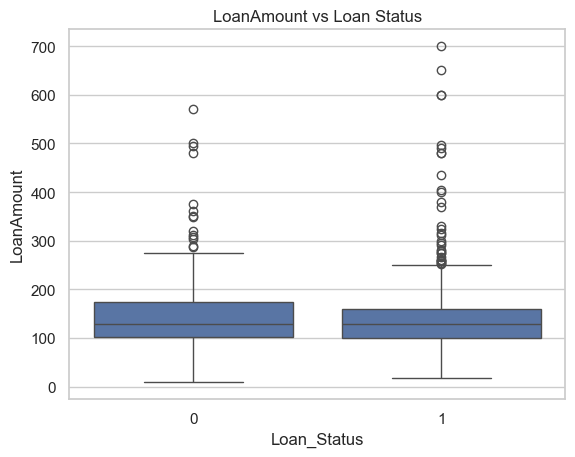

In [44]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=dataFrame)
plt.title("LoanAmount vs Loan Status")
plt.show()


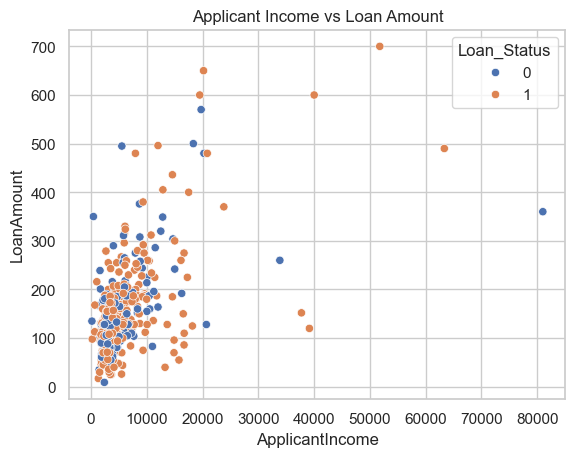

In [45]:
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", hue="Loan_Status", data=dataFrame)
plt.title("Applicant Income vs Loan Amount")
plt.show()


# FEATURE ENGINEERING

In [46]:
# Dropping our target Attribute(Column) i.e. Loan_Status.
X = dataFrame.drop("Loan_Status", axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [47]:
# Target attribute stored in vector y.
y = dataFrame["Loan_Status"]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [48]:
# In order to bring all values in a standard scale, we perform feature scaling to only those columns whose values are not already in a consistent range.
non_consistant_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [49]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[non_consistant_columns] = st.fit_transform(X[non_consistant_columns])
X
# Now all the columns are in specific range. i.e., Feature Scaling is Done.


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,0.072991,-0.554487,-0.211241,0.273231,1.0,1
1,1,1,1,1,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0
2,1,1,0,1,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1
3,1,1,0,0,0,-0.462062,0.251980,-0.306435,0.273231,1.0,1
4,1,0,0,1,0,0.097728,-0.554487,-0.056551,0.273231,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.410130,-0.554487,-0.889500,0.273231,1.0,0
610,1,1,4,1,0,-0.212557,-0.554487,-1.258378,-2.522836,1.0,0
611,1,1,1,1,0,0.437174,-0.472404,1.276168,0.273231,1.0,1
612,1,1,2,1,0,0.357064,-0.554487,0.490816,0.273231,1.0,1


## Train Test Split

In [50]:
# Spliting the dataFrame into Train & Test Model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

# Model Training Using Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Prediction testing
y_prediction = model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Model Acuuracy, Detailed Report & Confusion Matrix

Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



Text(47.25, 0.5, 'Actual')

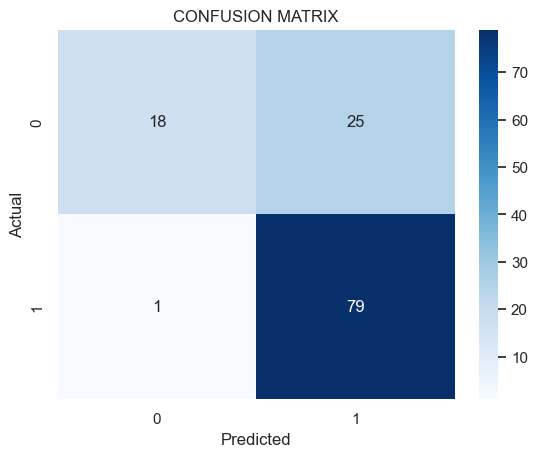

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_prediction))

# Detailed report
print("Classification Report:\n", classification_report(y_test, y_prediction))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt='d', cmap='Blues')
plt.title("CONFUSION MATRIX")
plt.xlabel("Predicted")
plt.ylabel("Actual")